In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [5]:
titanic_data=pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#remove missing /null value
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [10]:
# replace missing value with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [11]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [12]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
 # Analysing the data

In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# how many survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
# visualizing data
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

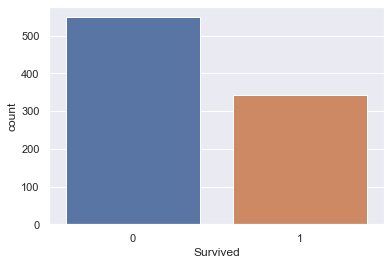

In [17]:
sns.countplot(titanic_data['Survived'])

In [18]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

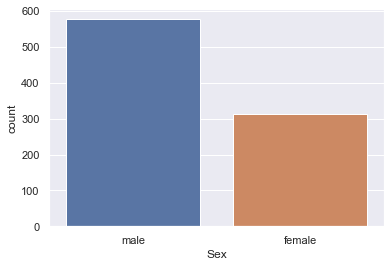

In [19]:
# count plot for sex column
sns.countplot(titanic_data['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

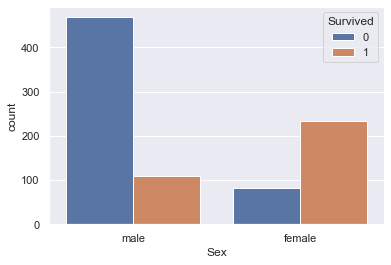

In [20]:
# Analysing Gender wise survived
sns.countplot(x='Sex',hue="Survived",data=titanic_data)

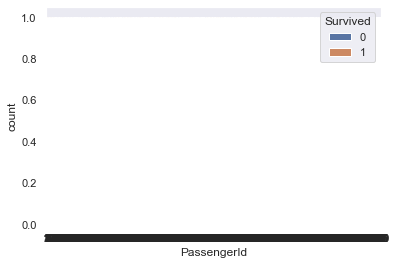

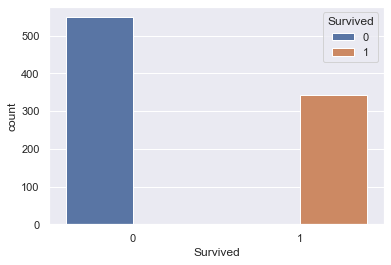

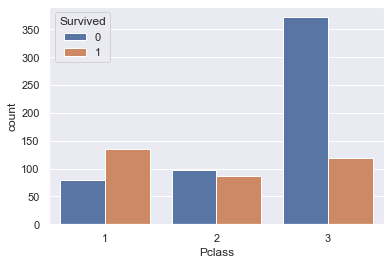

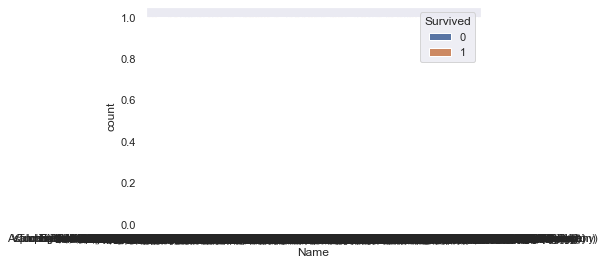

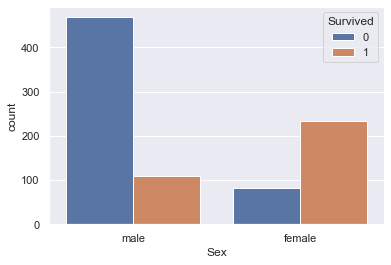

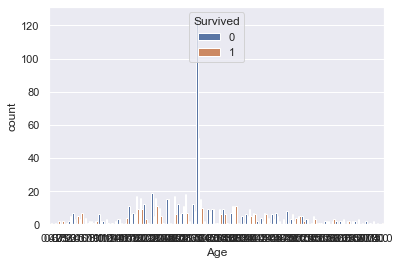

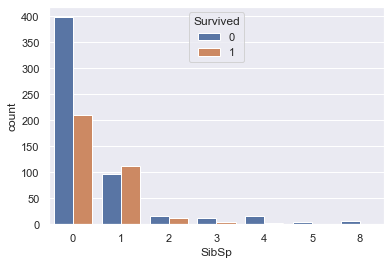

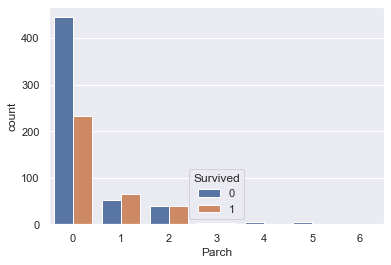

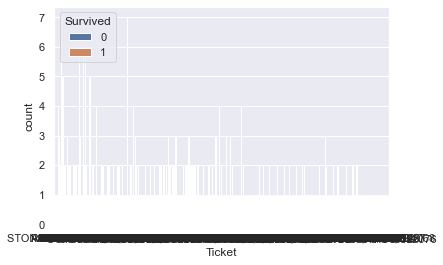

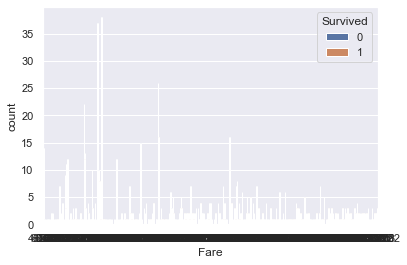

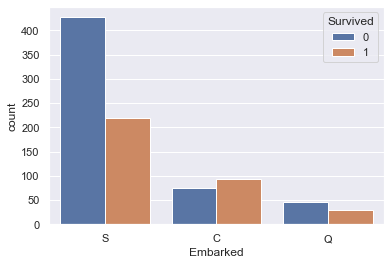

In [21]:
for i in titanic_data.columns:
  sns.countplot(x=i,hue="Survived",data=titanic_data)
  plt.show()

# Encoding categorical columns/data

In [23]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
# we encode the categorical data of column sex and embarked not in string but in integer
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'sex' column
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])


In [41]:


# Initialize the LabelEncoder
le1 = LabelEncoder()

# Fit and transform the 'Embarked' column
titanic_data['Embarked'] = le1.fit_transform(titanic_data['Embarked'])

In [42]:
x=titanic_data.drop(columns =['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_data['Survived']

In [43]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#  Split the data into train and test

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [45]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


# Logistical regression and model training

In [46]:
model=LogisticRegression()

In [47]:
# use the train data on logisticaregression model
model.fit(x_train,y_train)

LogisticRegression()

# evaluating and testing the model

In [50]:
x_train_prediction=model.predict(x_train)

In [51]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [52]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.8132022471910112


In [53]:
#check accuracy of test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data:',test_data_accuracy)

Accuracy score of test data: 0.7877094972067039


In [54]:
# ends...but
import joblib
joblib.dump(model,'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [57]:
!pip install pyngrok

In [59]:
import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken
ngrok.set_auth_token("")
#running flask app 
os.system("nohup python-m flask run --no-reload &")
#opening ngrok tunnel to the flask app uding http protocol 
proc =subprocess. Popen(["ngrok", "http", "5000"])
#Retrive ngrok's public url here
public_url =ngrok.connect(addr="5000", proto="http") 
print("Public URL:", public_url)

t=2024-08-10T12:51:29+0530 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
t=2024-08-10T12:51:29+0530 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
t=2024-08-10T12:51:29+0530 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [61]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML


# Load the trained model
model joblib.load('logistic_regression_model.pkl')

app Flask(_name__)

@app.route('/')

def home():
   # HTML form to take inputs
     html_form = """"
      <!DOCTYPE html>
      <html lang="en">
     <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
         <title>Titanic Survival Prediction</title>
      </head>
       <body>
      <h2>Titanic Survival Prediction</h2>
      <form id="predictionForm" method="post" action="/predict">
          <label for="pclass">Pclass:</label>
            <input type="text" id="pclass" name="pclass"><br><br>
            <label for="sex">Sex (0 for male, 1 for female): </label> <input type="text" id="sex" name="sex"><br><br>
            <label for="age">Age: </label>
            <input type="text" id="age" name="age"><br><br>
            <label for="sibsp">Sibsp:</label>
            <input type="text" id="sibsp" name="sibsp"><br><br>
            <label for="parch">Parch: </label>
             <input type="text" id="parch" name="parch"><br><br>
             <label for="fare">Fare: </label>
             <input type="text" id="fare" name="fare"><br><br>
             <label for="embarked">Embarked (o for S, 1 for C, 2 for Q): </label> <input type="text" id="embarked" name="embarked"><br><br>
             <button type="button" onclick="predictSurvival()">Predict</button>
          </form>
          <p id="predictionResult"></p>
          <script>
             function predictSurvival(){
                var xhr = new XMLHttpRequest();
               var url="/predict";
                var data = new FormData (document.getElementById("predictionForm")); // Changed to FormData
                      xhr.open("POST", url, true);
                 xhr.onreadystatechange= function () {
                 if (xhr.readyState === 4 && xhr.status === 200) {
                 var response = JSON.parse(xhr.responseText);
                 document.getElementById("predictionResult").innerHTML "Survival Prediction: + response.prediction;
                }
                };
                   xhr.send(data);
                   }
                      </script>
           </body>
       </html>
       """
    return html_form
@app.route('/predict', methods=['POST'])
def predict():
    #Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare= request.form['fare']
    embarked = request.form['embarked']
    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare float(fare)
    embarked int(embarked)
    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]
    return jsonify({'prediction': int (prediction)})


def run flask_app():
    # Run Flask app on port 5000 app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)
    # Start ngrok tunnel
    public_url = ngrok.connect(addr="5000", proto="http") print("Public URL:", public_url)
    # Display ngrok tunnel URL
    display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>(public_url}</p>"))
    try:
        # Keep the Flask app running
        run_flask_app()
    except KeyboardInterrupt: #Shutdown ngrok and Flask app
        ngrok.kill()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 60)